In [1]:
import pandas as pd
import pickle
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

rnd_state = 42

In [2]:
with open("/home/luca/Desktop/experiment/tmp/dataset/dataset1.pickle", "rb") as f:
    df = pickle.load(f)

In [3]:
df.head()

,generic_fileSize,generic_fileEntropy,header_SizeOfHeaders,header_AddressOfEntryPoint,header_ImageBase,header_SizeOfImage,header_SizeOfCode,header_SizeOfInitializedData,header_SizeOfUninitializedData,header_BaseOfCode,...,pesection_12_exists,pesection_12_isStandard,pesection_13_exists,pesection_13_isStandard,pesection_14_exists,pesection_14_isStandard,pesection_15_exists,pesection_15_isStandard,pesection_16_exists,pesection_16_isStandard
sample_hash,,,,,,,,,,,,,,,,,,,,,
cfa2d5eeac7de9f134cb2e36d54a5c4053f62fdf9d5302994557da1287719414,1666137,7.996651,1024,5358807,4194304,5365760,310272,56832,0,4096,...,True,False,False,False,False,False,False,False,False,False
00ebebc75f61527282cee19ab7aed80693b63fbb969e7154d17838f9dd08db2f,10543104,4.821304,4096,4512,4194304,118784,94208,20480,0,4096,...,False,False,False,False,False,False,False,False,False,False
f45e6ca3a2bbbaa1c514d81abe9daaa47f7d41da500e6933f61adf29f5f39835,57368,4.979988,4096,9759,4194304,57344,8192,45056,0,4096,...,False,False,False,False,False,False,False,False,False,False
d694a203bb211751669f8742db877e8ebd5eff5b126abc4c3e59cdb81f9dbb56,7922688,7.950081,1024,155508,4194304,7950336,570880,7350784,0,4096,...,False,False,False,False,False,False,False,False,False,False
15c9feb810c48ffef1c7e32cbe58a11037da94e958fb1f34e8feca1643dd80eb,159744,5.911521,4096,86524,4194304,159744,86016,69632,0,4096,...,False,False,False,False,False,False,False,False,False,False


In [4]:
#df = df.drop("pesectionProcessed_entrypointSection_name", axis=1)

# Check if any column is of type bool
is_bool_column = df.dtypes == 'bool'
bool_cols = df.columns[is_bool_column]

for bool_col in bool_cols:
    df[bool_col] = df[bool_col].astype(int)

In [5]:
df = df.drop("pesectionProcessed_entrypointSection_name", axis=1)

In [19]:
X = df.iloc[:, :10]
sns.pairplot(pd.DataFrame(X))

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f705fd5ca10>>
Traceback (most recent call last):
  File "/home/luca/Desktop/ml-malware-concept-drift/venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 

KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7f70142a2980> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x7f7044532ac0> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



In [ ]:
# param_grid = {'n_clusters': list(range(2, 10))}
# sil_thr = 0  # visualize results only for combinations with silhouette above the threshold
# # unc_thr = 33 # visualize results only for combinations with unclustered% below the threshold
# unc_thr = 10 # visualize results only for combinations with unclustered% below the threshold
# params = list(ParameterGrid(param_grid))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from plot_clusters import plot_clusters

In [14]:
X = df

In [15]:
X = X.to_numpy()

In [9]:
# # print("{:}\t{:}\t{:}\t{:}\t{:}".\
# #       format('eps','min_samples',' n_clusters',' silhouette', 'unclust%'))
# for i in range(len(params)):
#     clustering = AgglomerativeClustering(**(params[i]))
#     y_db = clustering.fit_predict(X)
#     cluster_labels_all = np.unique(y_db)
#     cluster_labels = cluster_labels_all[cluster_labels_all != -1]
    
#     n_clusters = len(cluster_labels)
#     if n_clusters > 1:
#         X_cl = X[y_db != -1, :]
#         y_db_cl = y_db[y_db != -1]
#         silhouette = silhouette_score(X_cl, y_db_cl)
#         uncl_p = (1 - y_db_cl.shape[0] / y_db.shape[0]) * 100
#         if silhouette > sil_thr and uncl_p < unc_thr:
#             print(f"{n_clusters}, {silhouette}, {uncl_p}")

In [10]:
from scipy.cluster.hierarchy import dendrogram

In [7]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [17]:
# # setting distance_threshold=0 ensures we compute the full tree.
# model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# model = model.fit(X)
# plt.title("Hierarchical Clustering Dendrogram")
# # plot the top three levels of the dendrogram
# plot_dendrogram(model, truncate_mode="level", p=10)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.show()

[4.04122721e+16 2.88487629e+16]


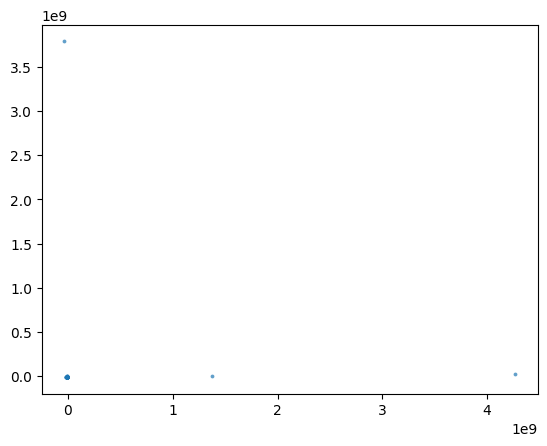

In [18]:
from sklearn.decomposition import PCA
#PCA with two principal components
PCA_2d = PCA(n_components=2).fit(X)
#PCA_2d.head()
print(PCA_2d.explained_variance_)
PCA_2d = PCA(n_components=2).fit_transform(X)
plt.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7, edgecolor='k')

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

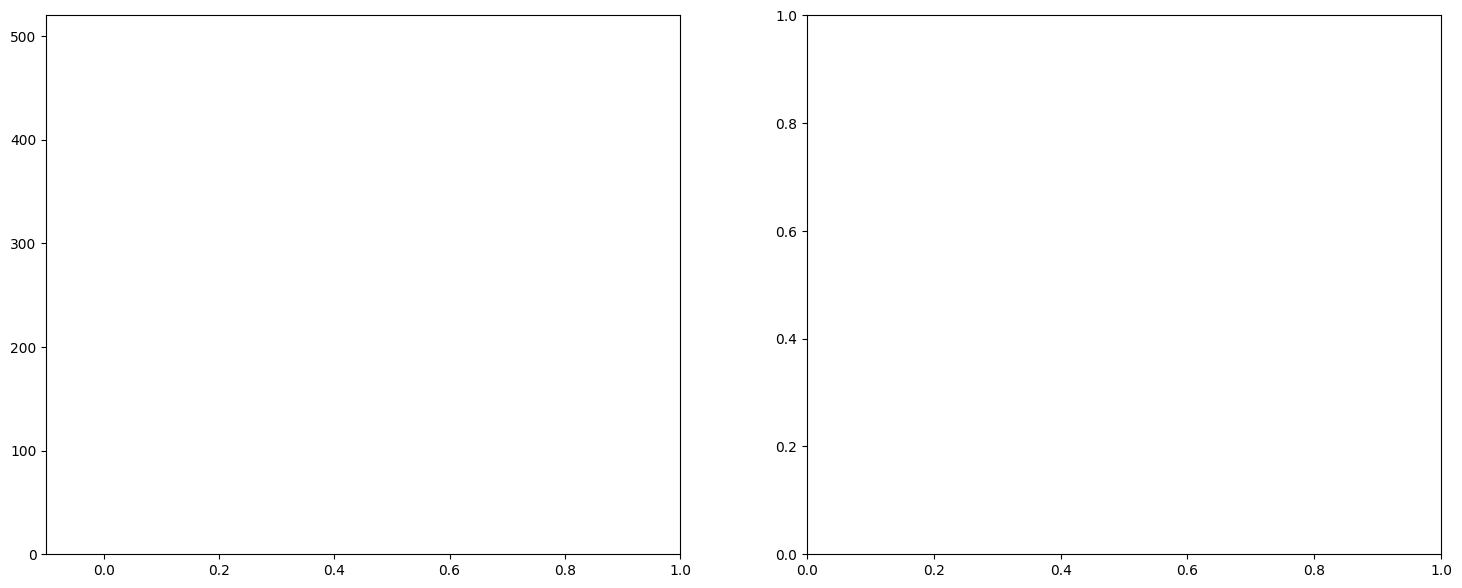

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
 
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i+1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral((cluster_labels.astype(float)) / n_clusters)
    ax2.scatter(PCA_2d[:, 0], PCA_2d[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

   

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for clustering on  data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()